In [1]:
#Packages  Required for Machine Learning and Prediction
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn

In [2]:
#Data Manupulation Libraries
import numpy as np
import pandas as pd
#Data Visualization Libararies
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#Reading the CSV file
data = pd.read_csv("BTC-USD.csv")
#Sorting the Given file's Data 
data = data.sort_values('Date')
#Lets See the peal of the data set
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2558,2021-09-18,47273.527344,48791.781250,47087.285156,48278.363281,48278.363281,2.857563e+10
2559,2021-09-19,48268.855469,48328.367188,46919.804688,47260.218750,47260.218750,2.696772e+10
2560,2021-09-20,47261.406250,47328.199219,42598.914063,42843.800781,42843.800781,4.390985e+10
2561,2021-09-21,43012.234375,43607.609375,39787.609375,40693.675781,40693.675781,4.870109e+10
2562,2021-09-22,40876.207031,42730.035156,40710.582031,42054.437500,42054.437500,4.457218e+10


In [6]:
a = data.loc[1101::]
a.reset_index(inplace=True)
a.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,1101,2017-09-22,3628.020020,3758.270020,3553.530029,3630.699951,3630.699951,1.194830e+09
1,1102,2017-09-23,3629.919922,3819.209961,3594.580078,3792.399902,3792.399902,9.281140e+08
2,1103,2017-09-24,3796.149902,3796.149902,3666.899902,3682.840088,3682.840088,7.680150e+08
3,1104,2017-09-25,3681.580078,3950.250000,3681.580078,3926.070068,3926.070068,1.374210e+09
4,1105,2017-09-26,3928.409912,3969.889893,3869.899902,3892.350098,3892.350098,1.043740e+09


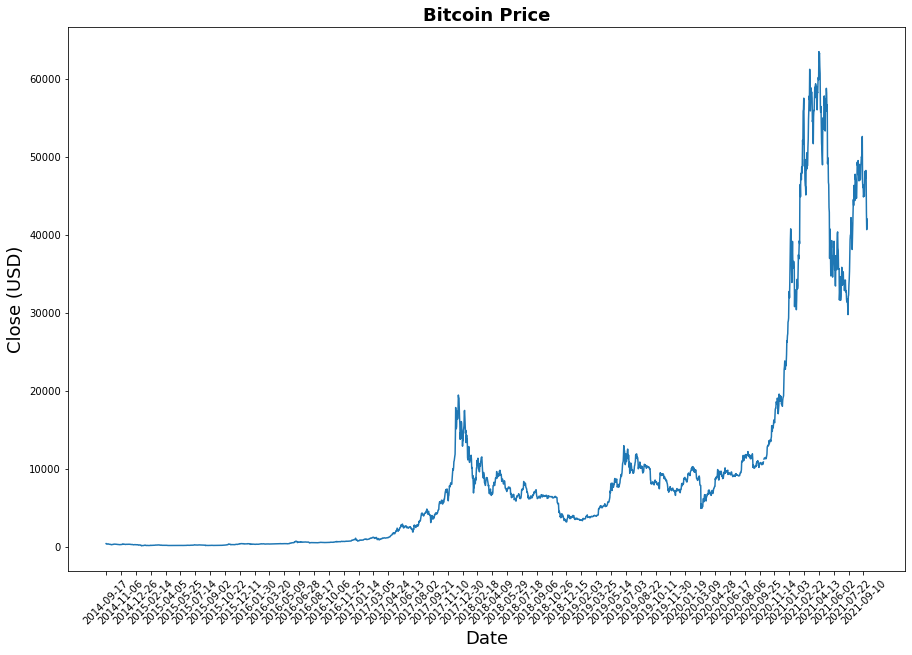

In [7]:
#Creating a dataframe for closing price (USD) column as it's our target variable to predict.
price = data[['Close']]
#Ploting the price for the historical data of bitcoin
plt.figure(figsize = (15,10))
plt.plot(price)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close (USD)',fontsize=18)
plt.show()

In [8]:
#Let's see the price
price

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
2558,48278.363281
2559,47260.218750
2560,42843.800781
2561,40693.675781


In [9]:
#Now have a look on the summary of price dataframe
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2563 entries, 0 to 2562
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2559 non-null   float64
dtypes: float64(1)
memory usage: 104.0 KB


In [10]:
from sklearn.preprocessing import MinMaxScaler
#This returns default value between 0-10
min_max_scaler = MinMaxScaler()
#Fitting these val ues
norm_data = min_max_scaler.fit_transform(price.values)

In [11]:
norm_data

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.6737538 ],
       [0.63980018],
       [0.6612886 ]])

In [12]:
#Let's try to compare values before and after normalization
print(f'Real: {price.values[0]}, Normalized: {norm_data[0]}')
print(f'Real: {price.values[500]}, Normalized: {norm_data[500]}')
print(f'Real: {price.values[1000]}, Normalized: {norm_data[1000]}')
print(f'Real: {price.values[1500]}, Normalized: {norm_data[1500]}')


Real: [457.334015], Normalized: [0.00440947]
Real: [378.255005], Normalized: [0.00316069]
Real: [2717.02002], Normalized: [0.04009321]
Real: [6474.75], Normalized: [0.09943327]


In [13]:
def unvariate_data(dataset,start_index,end_index,history_size,target_size):
    data2 = []
    labels = []
    
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        #Reshape  data from (history_size,) to (history_size, 1)
        data2.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

past_history = 5
future_target = 0
#Here we are using last 5 days data to learn and predict the next point in the time series

#last indexed 80% data using for training
TRAIN = int(len(norm_data)*0.8)

x_train, y_train = unvariate_data(norm_data,0,TRAIN,past_history,future_target)

x_test,y_test = unvariate_data(norm_data,TRAIN,None,past_history,future_target)

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,LSTM,leakyReLU, Dropout

num_units = 64 #Numbers of neurons
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse' #mse = Mean Squar error
batch_size = 5
num_epochs = 250

#initialize the RNN
model = Sequntial()
#keras has simply the stack multiple layers on top of each other, for this we need to initialize the model as Sequential()
model.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
#This layer helps to prevent overfitting by ignoring randomly selected neurons during training, and reduces the sensitivity of specific neurons..
model.add(Dense(units=1))  #fully connected layer

#compiling the RNN
model.compile(optimizer=adam, loss=loss_function)


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
#Train the Model using Training set
history = model.fit(x_train, y_train, validation_split=0.1, batch_size=batch_size, epochs=num_epochs, shuffle=False)


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(15,10))

plt.plot(epochs, loss, 'b', label ='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title("Training Loss VS Validation Loss")
plt.legend()

plt.show()

In [ ]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color = 'royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color="tomato")
ax.set_title("Bitcoin Price", size = 14, fontweight='bold')
ax.set_xlabel("Days", size=14)
ax.set_ylabel("Cost (USD)", size=14)
ax.set_xticklabels('', size=10)

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached aiohttp-3.7.4.post0-cp38-cp38-win32.whl (610 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1-cp38-cp38-win32.whl (55.7 MB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Shamsher\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Shamsher\\AppData\\Local\\Temp\\pip-install-79yii29x\\fbprophet_05152663b0e245b9a4aec5ff670ca674\\setup.py'"'"'; __file__='"'"'C:\\Users\\Shamsher\\AppData\\Local\\Temp\\pip-install-79yii29x\\fbprophet_05152663b0e245b9a4aec5ff670ca674\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Shamsher\AppData\Local\Temp\pip-wheel-e9pmmpao'
       cwd: C:\Users\Shamsher\AppData\Local\Temp\pip-install-79yii29x\fbprophet_05152663b0e245b9a4aec5ff670ca674\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\li